Задание 9.

Представим, что у нас был процесс обзвона клиентов с предложением продлить подписку на наше приложение. Вероятность успеха составляла p=0.1 (каждый десятый звонок заканчивался продлением подписки).

Мы сделали новый алгоритм подбора клиентов для обзвона. Из 1000 тестовых звонков 113 закончились успешно.

Мы хотим проверить, значимо ли это отклонение от бейзлайна в 10%. Посчитайте p-value для нулевой гипотезы о равенстве доли p=0.1, альтернатива двусторонняя.

In [45]:
import scipy

In [35]:
F_H0 = scipy.stats.binom(n=1000, p=0.1)

In [42]:
p_1 = 1 - F_H0.cdf(113 - 1)
p_1

0.09540800627807666

In [43]:
p_2 = F_H0.cdf(100 - 13 - 1)
p_2

0.07510583595881734

In [44]:
p = p_1 + p_2
p

0.170513842236894

Задание 10.

Представим, что мы проверяем, изменилась ли средняя температура в нашем городе. Мы провели 100 замеров в разное время суток и разных местах, получили среднее значение, равное 18.1 градусам, среднеквадратичное отклонение, оценённое по выборке, 8.2 градуса. Хотим проверить, изменилась ли средняя температура, если ранее она составляла 16.5 градусов.

Посчитайте p-value для t-критерия Стьюдента, альтернатива двусторонняя.

In [46]:
x = 18.1
Mu = 16.5
N = 100
sd = 8.2

t = (x - Mu) * (N**0.5)/sd
t

1.951219512195124

In [51]:
p_val = scipy.stats.t.cdf(x=-t, df=99) * 2
p_val

0.05385741608695007

In [52]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [142]:
df_less_30_idx = df[df['HouseAge'] <= 30].index
target_less_30 = target[df_less_30_idx]

In [143]:
df_more_30_idx = df[df['HouseAge'] > 30].index
target_more_30 = target[df_more_30_idx]

In [146]:
import numpy as np

x_1 = np.mean(target_less_30)
std_1 = np.std(target_less_30)
df_1 = len(target_less_30) - 1

x_2 = np.mean(target_more_30)
std_2 = np.std(target_more_30)
df_2 = len(target_more_30) - 1

t = abs(x_1 - x_2) / (std_1 ** 2 / df_1 + std_2 ** 2 / df_2)**0.5
t

10.16820313245738

In [147]:
p_val = scipy.stats.t.cdf(x=-t, df=df_1 + df_2) * 2
p_val

3.1358799854537184e-24

/var/folders/3y/rd5ld8cn7bv7yr9nlqd8vf0c0000gn/T/ipykernel_942/3188157299.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(target)


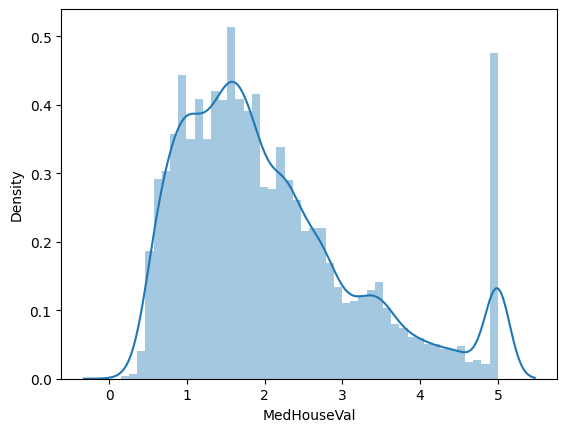

In [160]:
import seaborn as sns

sns_plot = sns.distplot(target)
fig = sns_plot.get_figure()

/var/folders/3y/rd5ld8cn7bv7yr9nlqd8vf0c0000gn/T/ipykernel_942/4216023426.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(target_normalised)


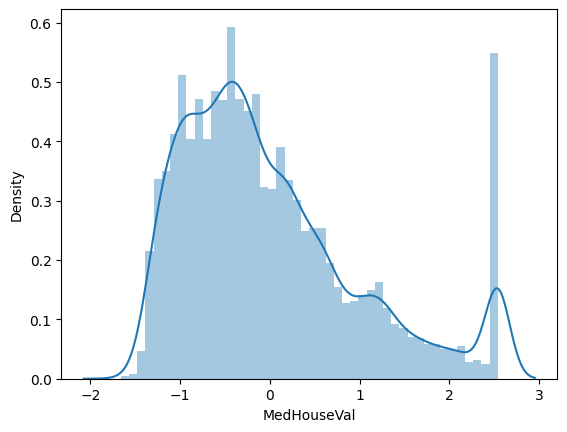

In [162]:
target_normalised = (target - np.mean(target)) / np.std(target)

sns_plot = sns.distplot(target_normalised)
fig = sns_plot.get_figure()

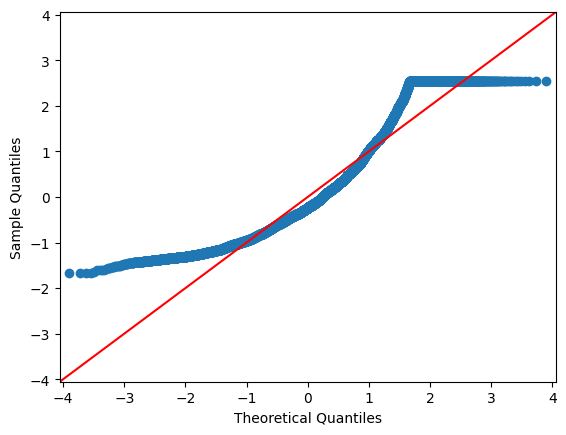

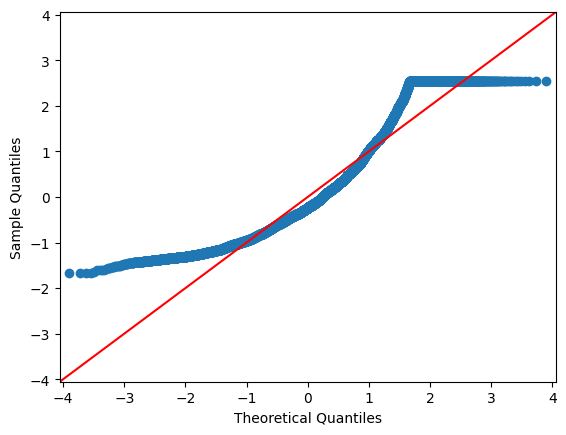

In [163]:
import statsmodels.api as sm

sm.qqplot(target_normalised, line='45')

Perform the Shapiro-Wilk test for normality

In [177]:
shapiro = scipy.stats.shapiro(target_normalised)
shapiro

ShapiroResult(statistic=0.9123021364212036, pvalue=0.0)

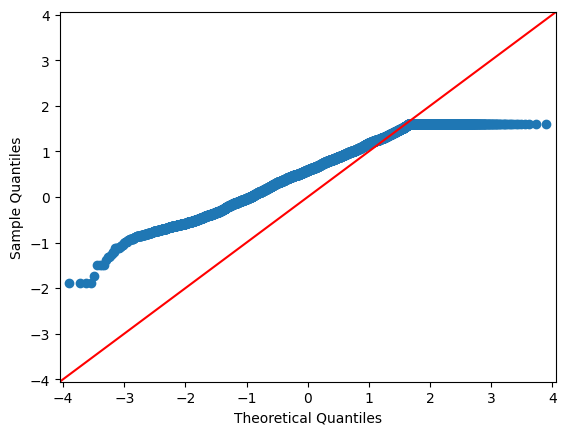

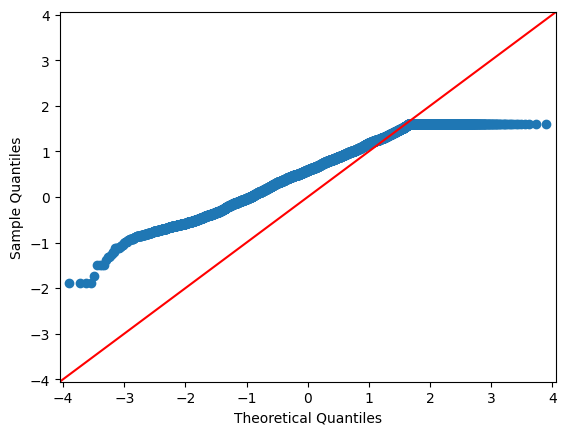

In [175]:
target_log = np.log(target)

sm.qqplot(target_log, line='45')

In [178]:
shapiro = scipy.stats.shapiro(target_log)
shapiro

ShapiroResult(statistic=0.9876536130905151, pvalue=2.519914670999546e-38)